# 🚖 Uber Ride Fare Prediction Project
Complete lecture with EDA, Feature Engineering, ML Models & Best Model Selection

## 1. Introduction
- Real-world regression problem: predict Uber ride **fare amount**.
- Dataset: [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- Sample data URL:
```python
url = "https://raw.githubusercontent.com/shubham0204/Datasets/master/uber_fares.csv"
```

In [1]:
import pandas as pd

df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 1:09:00,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 0:42:00,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


🔎 **Explanation**: Loaded dataset, previewed first rows and structure.

In [2]:
# Missing values
df.isnull().sum()

# Summary statistics
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [3]:
# Missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df['fare_amount']

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

🔎 **Explanation**: Checked missing values and summary statistics.

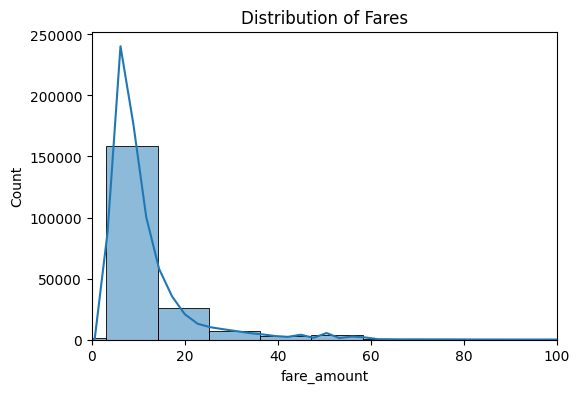

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of fares
plt.figure(figsize=(6,4))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fares")
plt.xlim(0,100)
plt.show()



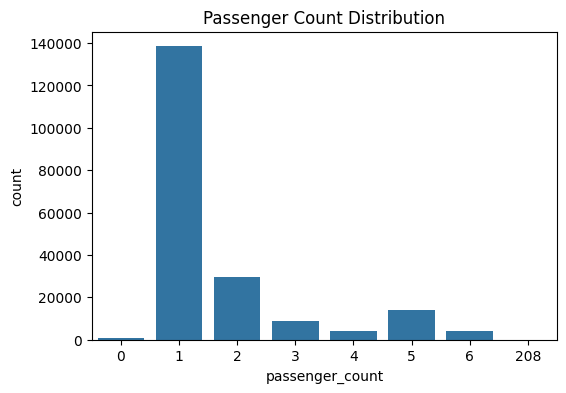

In [6]:
# Passenger count distribution
plt.figure(figsize=(6,4))
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.show()

🔎 **Explanation**: Distribution of fares (most <$50) and passenger count (mostly 1–2).

In [7]:
import numpy as np

# Convert datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Extract features
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month

# Remove unrealistic fares
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 200)]

# Drop original datetime
df.drop(columns=['pickup_datetime'], inplace=True)

print(df.head())

   Unnamed: 0                  key  fare_amount  pickup_longitude  \
0    24238194  2015-05-07 19:52:06          7.5        -73.999817   
1    27835199  2009-07-17 20:04:56          7.7        -73.994355   
2    44984355  2009-08-24 21:45:00         12.9        -74.005043   
3    25894730   2009-06-26 8:22:21          5.3        -73.976124   
4    17610152  2014-08-28 17:47:00         16.0        -73.925023   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.738354         -73.999512         40.723217                1   
1        40.728225         -73.994710         40.750325                1   
2        40.740770         -73.962565         40.772647                1   
3        40.790844         -73.965316         40.803349                3   
4        40.744085         -73.973082         40.761247                5   

   hour  weekday  month  
0    19        3      5  
1    20        4      7  
2    21        0      8  
3     8        4      6 

C:\Users\Emad\AppData\Local\Temp\ipykernel_12912\1618899457.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['pickup_datetime'], inplace=True)


🔎 **Explanation**: Extracted time features and removed extreme fares.

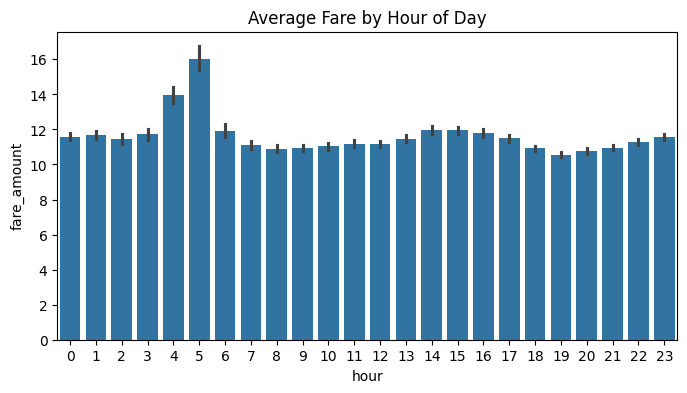

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(x='hour', y='fare_amount', data=df)
plt.title("Average Fare by Hour of Day")
plt.show()

🔎 **Explanation**: Fares are higher during rush hours and late nights.

In [9]:
from sklearn.model_selection import train_test_split

# Drop rows with any NaN values (do this after all feature engineering)
df = df.dropna()

# Select features and target
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Keep only numeric columns in X
X = X.select_dtypes(include=[np.number])
print("Feature columns used for training:", X.columns.tolist())

# Split into train and test sets (only once)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature columns used for training: ['Unnamed: 0', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'weekday', 'month']


In [10]:
# Ensure all features are numeric
print("Feature dtypes before model training:")
print(X.dtypes)


# Drop any non-numeric columns (object or datetime)
X = X.select_dtypes(include=[np.number])
print("Feature columns used for training:", X.columns.tolist())

Feature dtypes before model training:
Unnamed: 0             int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
weekday                int32
month                  int32
dtype: object
Feature columns used for training: ['Unnamed: 0', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'weekday', 'month']


🔎 **Explanation**: Split data into training (80%) and testing (20%).

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


models = {
    "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    # "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest": RandomForestRegressor()
}

results = {}


In [16]:
models = {
    # "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    # "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest": RandomForestRegressor()
}

In [18]:
models = {
    # "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    # "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest": RandomForestRegressor()
}

In [20]:
models = {
    # "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest": RandomForestRegressor()
}

In [24]:
models = {
    # "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(),
    # "Lasso Regression": Lasso(),
    # "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=10)
}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']:.2f}, R²={metrics['R²']:.2f}")

Model Performance:
Linear Regression: RMSE=9.82, R²=0.00
Ridge Regression: RMSE=9.82, R²=0.00
Lasso Regression: RMSE=9.83, R²=0.00
Decision Tree: RMSE=6.23, R²=0.60
Random Forest: RMSE=4.69, R²=0.77


🔎 **Explanation**: Compared multiple models on RMSE and R² metrics.

In [26]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Final R²:", r2_score(y_test, y_pred))

KeyboardInterrupt: 

In [27]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(n_estimators=10, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Final R²:", r2_score(y_test, y_pred))

Final RMSE: 4.657746878019131
Final R²: 0.7755079330100267


🔎 **Explanation**: Random Forest had the lowest RMSE and highest R² → best model.

## 10. Conclusion
- Most fares <$50, higher during rush hours.
- Linear/Ridge/Lasso weaker, Decision Tree better but overfits.
- **Random Forest performed best** ✅

## 🎯 Student Tasks
1. Add correlation heatmap & scatterplots.
2. Engineer trip distance (haversine).
3. Try Gradient Boosting/XGBoost.
4. Compare RMSE, MAE, R².
5. Submit a short project report.